In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

In [22]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

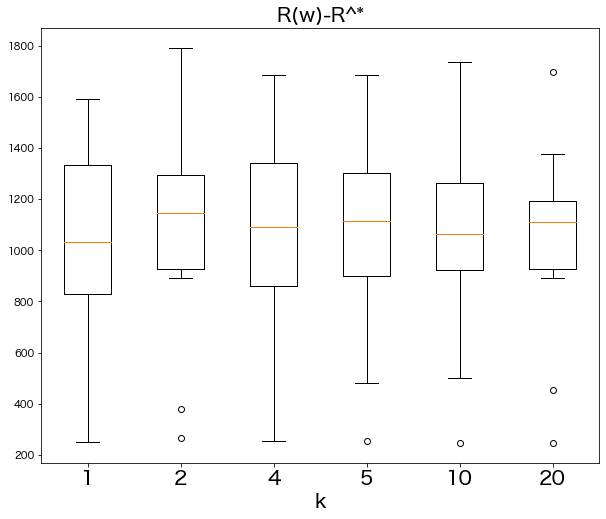

In [23]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [24]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,999.844197,1066.968519,1059.260594,1056.819503,1052.477266,1030.351289
std,431.919772,463.523147,451.158911,436.283338,450.330739,420.814962
min,248.839411,264.485733,255.123526,253.093727,246.497386,246.942204
25%,828.302816,927.643456,859.669353,898.337144,921.199835,928.317595
50%,1030.930284,1146.351700,1090.525832,1114.766745,1062.748633,1109.239163
75%,1333.310898,1292.648784,1343.069537,1301.135565,1264.049983,1193.945538
max,1591.170455,1792.213467,1685.510096,1686.431942,1737.789673,1695.627026


In [25]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1333.310898,1292.648784,1343.069537,1301.135565,1264.049983,1193.945538
0.80,1366.904317,1338.234601,1408.202951,1360.541385,1343.991345,1232.176728
0.90,1393.891936,1492.581460,1565.265323,1512.893589,1597.402054,1407.451186
0.95,1492.531196,1642.397464,1625.387710,1599.662765,1667.595864,1551.539106
0.99,1571.442603,1762.250266,1673.485619,1669.078106,1723.750911,1666.809442


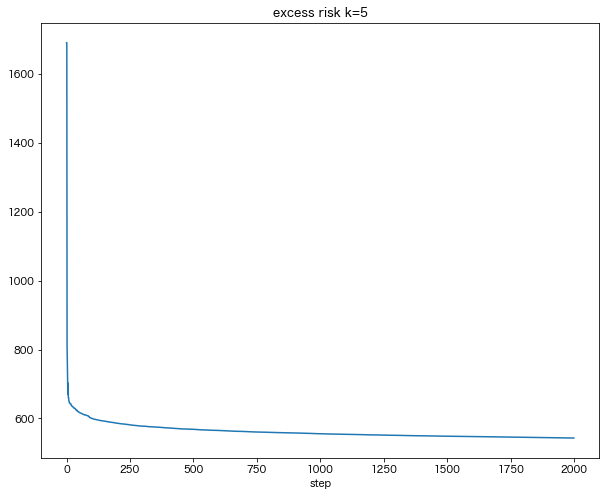

In [26]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [27]:
# 学習率は0.01/t * sqrt(d) ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

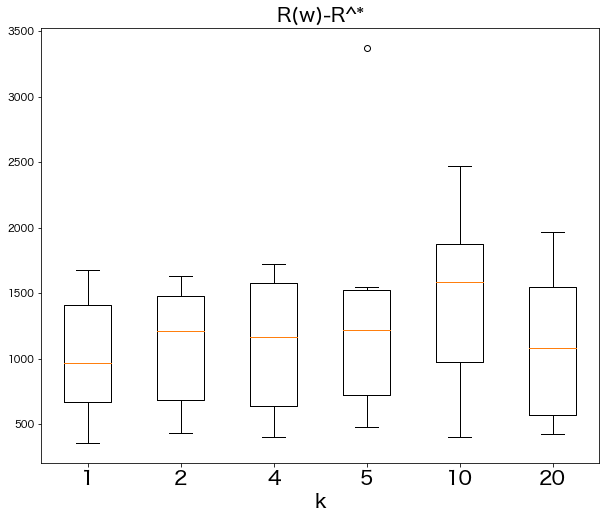

In [28]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [29]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1002.361499,1107.265662,1094.071443,1294.334516,1445.103889,1087.569518
std,461.165988,450.165998,520.600206,841.891018,691.142407,570.930178
min,355.106103,428.720926,400.193395,476.729463,402.534363,421.498006
25%,666.015689,683.292978,638.170368,722.964992,970.186745,566.835350
50%,969.701178,1210.326259,1167.503089,1216.993069,1587.188940,1078.160377
75%,1408.615017,1474.484793,1576.731015,1524.026320,1875.360765,1543.148130
max,1675.263564,1630.436700,1719.251822,3373.568675,2468.584252,1963.562756


In [30]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1408.615017,1474.484793,1576.731015,1524.026320,1875.360765,1543.148130
0.80,1476.604909,1520.077222,1642.926845,1543.307525,1957.058261,1610.668461
0.90,1527.887740,1610.199976,1675.775238,1728.638640,2176.684274,1729.178157
0.95,1601.575652,1620.318338,1697.513530,2551.103658,2322.634263,1846.370456
0.99,1660.525981,1628.413028,1714.904164,3209.075671,2439.394255,1940.124296


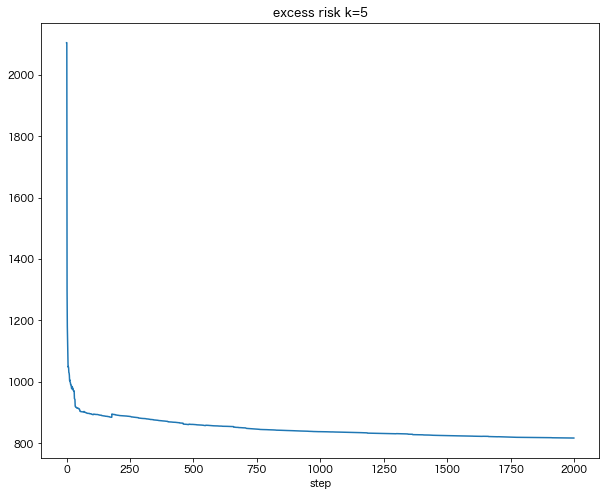

In [31]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [32]:
# 学習率は0.01/sqrt(d) (固定) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

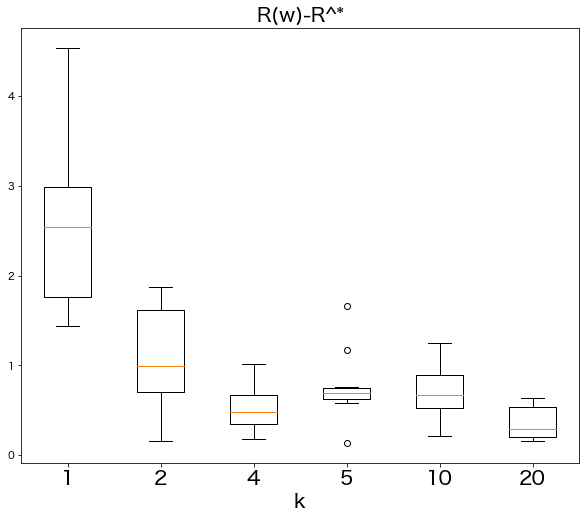

In [33]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [34]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.552676,1.112069,0.533395,0.766127,0.694465,0.356042
std,0.938440,0.593598,0.280922,0.401901,0.330687,0.191151
min,1.435592,0.154114,0.180378,0.133502,0.212258,0.158752
25%,1.758453,0.701386,0.342415,0.618747,0.522801,0.195870
50%,2.546684,0.989641,0.482228,0.694518,0.669733,0.286509
75%,2.981640,1.621177,0.674343,0.747612,0.889501,0.540029
max,4.539510,1.869711,1.016721,1.660719,1.250750,0.632344


In [35]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,2.981640,1.621177,0.674343,0.747612,0.889501,0.540029
0.80,3.096284,1.683621,0.727810,0.839158,0.924580,0.585524
0.90,3.421284,1.864049,0.918099,1.220412,1.060974,0.612579
0.95,3.980397,1.866880,0.967410,1.440566,1.155862,0.622461
0.99,4.427687,1.869145,1.006858,1.616688,1.231772,0.630367


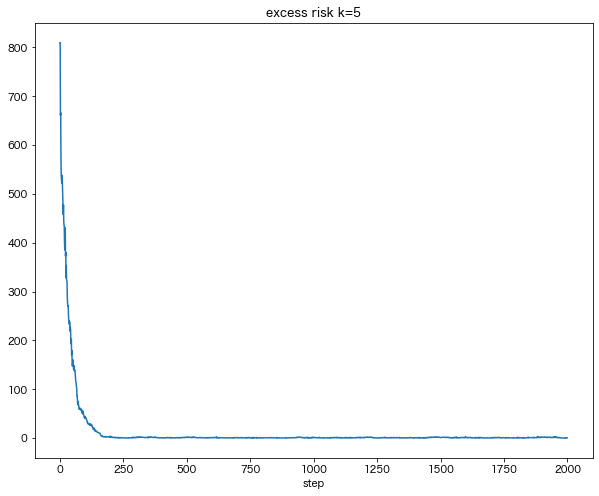

In [36]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [42]:
# 学習率は0.01/sqrt(d)　（固定） ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 1.7
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

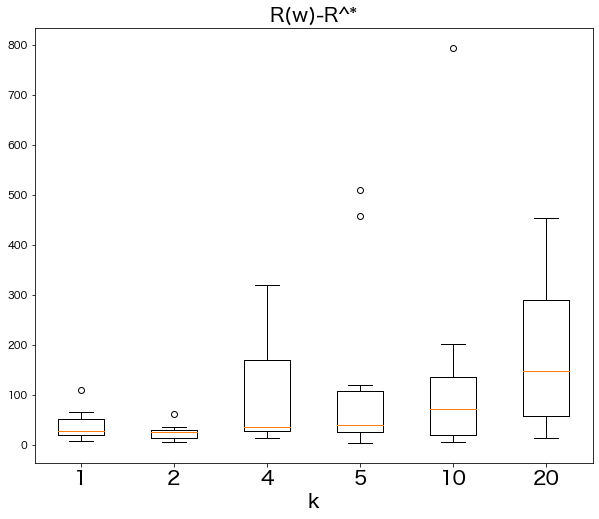

In [43]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [44]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,40.426481,25.389352,104.233010,130.513755,147.881062,182.183623
std,30.588626,16.417304,116.441133,189.652216,235.837733,153.774711
min,8.571604,5.719677,14.503460,4.198070,6.426022,14.408754
25%,20.850455,14.376554,27.606691,25.505787,20.901452,57.901918
50%,27.633788,26.059250,36.416583,40.108906,72.831026,148.138142
75%,52.270451,29.736047,170.500687,107.753038,135.612237,289.836310
max,110.778508,62.961484,320.080593,510.534953,794.059887,453.840925


In [45]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,52.270451,29.736047,170.500687,107.753038,135.612237,289.836310
0.80,55.456670,31.453066,216.678662,188.292513,153.830083,318.823795
0.90,70.161106,38.318714,281.006492,462.675367,260.818563,370.011087
0.95,90.469807,50.640099,300.543542,486.605160,527.439225,411.926006
0.99,106.716767,60.497207,316.173183,505.748994,740.735755,445.457942


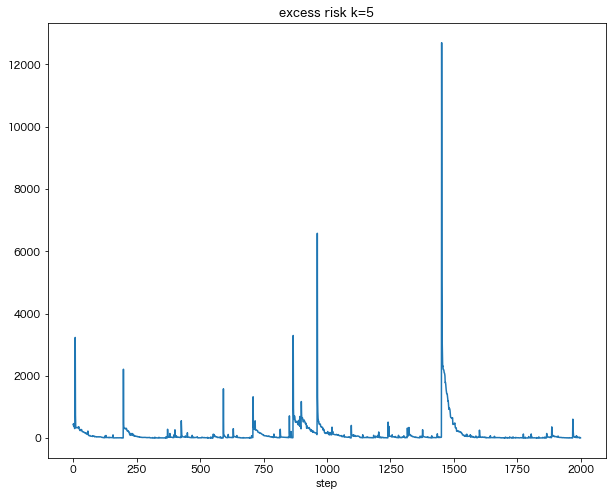

In [46]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()
